## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import os, shutil
import splitfolders
import PIL
import glob
import cv2
import time
from sklearn.metrics import confusion_matrix, confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report
import sys
import shutil
import glob as gb
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier

# Importing Dataset

In [3]:
class config:
    
    data_path = 'Dataset/'
    
    path_train = "./output/train"
    path_test = "./output/test"

In [4]:
splitfolders.ratio(config.data_path, output="output", seed=101, ratio=(.8, .2))

Copying files: 2640 files [00:01, 1326.41 files/s]


# Machine Learning

In [5]:
code = {
    'full_forg': 0,
    'full_org': 1
}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x

In [6]:
trainpath='output/train/'

X_train = []
y_train = []
for folder in  os.listdir(trainpath) : 
    files = gb.glob(pathname= str( trainpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (64,64))
        X_train.append(list(image_array))
        y_train.append(code[folder])
np.save('X_train',X_train)
np.save('y_train',y_train)

In [7]:
testpath='output/val/'

X_test = []
y_test = []
for folder in  os.listdir(testpath) : 
    files = gb.glob(pathname= str( testpath + folder + '/*'))
    for file in files: 
        image = cv2.imread(file)
        #resize images to 64 x 64 pixels
        image_array = cv2.resize(image , (64,64))
        X_test.append(list(image_array))
        y_test.append(code[folder])
np.save('X_test',X_test)
np.save('y_test',y_test)

In [8]:
loaded_X_train = np.load('X_train.npy')
loaded_X_test = np.load('X_test.npy')
loaded_y_train = np.load('y_train.npy')
loaded_y_test = np.load('y_test.npy')

In [9]:
print(loaded_X_train.shape)

(2112, 64, 64, 3)


In [10]:
print(loaded_y_train.shape)
print(loaded_y_test.shape)

(2112,)
(528,)


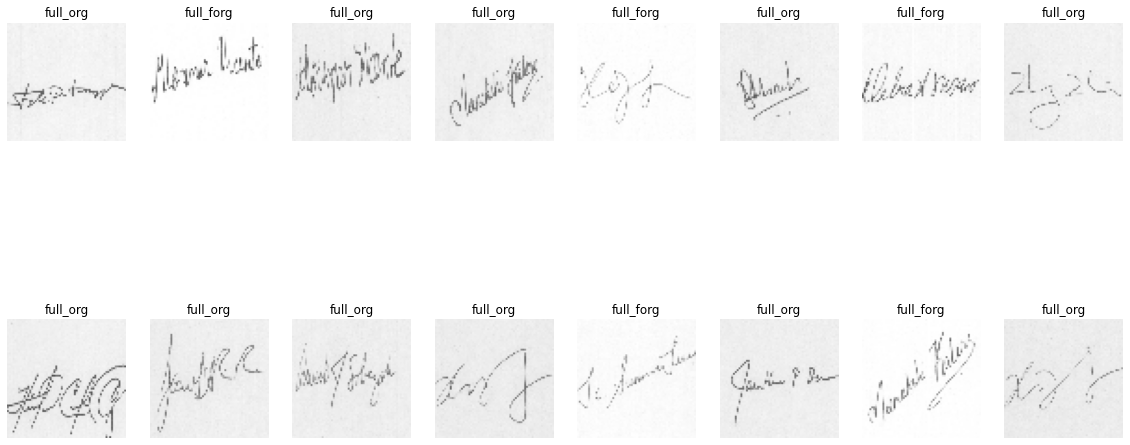

In [11]:
plt.figure(figsize=(20,10))
for n , i in enumerate(np.random.randint(0,len(loaded_X_train),16)): 
    plt.subplot(2,8,n+1)
    plt.imshow(loaded_X_train[i])
    plt.axis('off')
    plt.title(getcode(loaded_y_train[i]))

In [12]:
def plotHistogram(a):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(a)
    histo = plt.subplot(1,2,2)
    histo.set_ylabel('Count')
    histo.set_xlabel('Pixel Intensity')
    n_bins = 30
    plt.hist(a[:,:,0].flatten(), bins= n_bins, lw = 0, color='r', alpha=0.5)
    plt.hist(a[:,:,1].flatten(), bins= n_bins, lw = 0, color='g', alpha=0.5)
    plt.hist(a[:,:,2].flatten(), bins= n_bins, lw = 0, color='b', alpha=0.5)

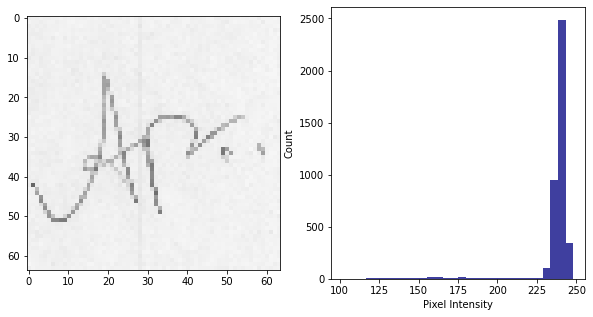

In [13]:
plotHistogram(loaded_X_train[np.random.randint(len(loaded_X_train))])

In [14]:
X_train = loaded_X_train.reshape([-1, np.product((64,64,3))])
X_test = loaded_X_test.reshape([-1, np.product((64,64,3))])

In [15]:
y_train = loaded_y_train
y_test = loaded_y_test

In [16]:
from sklearn.utils import shuffle as shf
X_train, y_train = shf(X_train, y_train, random_state=15)
X_test, y_test = shf(X_test, y_test, random_state=15)

# Model Building

In [17]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

# Multinomial Naive Bayes Classifier (MNBC)

In [18]:
mnb = MultinomialNB()
start_time = time.time()
mnb.fit(X_train, y_train)
end_time = time.time()
mnb_time = end_time - start_time

In [19]:
evaluate(mnb,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[736 320]
 [295 761]]
ACCURACY SCORE:
0.7088
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.713870     0.703978  0.708807     0.708924      0.708924
recall        0.696970     0.720644  0.708807     0.708807      0.708807
f1-score      0.705319     0.712213  0.708807     0.708766      0.708766
support    1056.000000  1056.000000  0.708807  2112.000000   2112.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[183  81]
 [ 77 187]]
ACCURACY SCORE:
0.7008
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.703846    0.697761  0.700758    0.700804      0.700804
recall       0.693182    0.708333  0.700758    0.700758      0.700758
f1-score     0.698473    0.703008  0.700758    0.700740      0.700740
support    264.000000  264.000000  0.700758  528.000000    528.000000


In [20]:
y_pred = mnb.predict(X_test)
a = accuracy_score(y_test, y_pred) * 100
p = precision_score(y_test,y_pred,average='macro') * 100 
r = recall_score(y_test,y_pred,average='macro') * 100
f = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity = (true_positives / (true_positives + false_negatives)) * 100
specificity = (true_negatives / (true_negatives + false_positives)) * 100


print("Accuracy: {:.2f}%".format(a))
print("Precision: {:.2f}%".format(p))
print("Recall: {:.2f}%".format(r))
print("F1-score: {:.2f}%".format(f))
print("Sensitivity: {:.2f}%".format(sensitivity))
print("Specificity: {:.2f}%".format(specificity))


Accuracy: 70.08%
Precision: 70.08%
Recall: 70.08%
F1-score: 70.07%
Sensitivity: 70.83%
Specificity: 69.32%


# Bernoulli Naive Bayes Classifier (BNBC)

In [21]:
bnb = BernoulliNB()
start_time = time.time()
bnb.fit(X_train, y_train)
end_time = time.time()
bnb_time = end_time - start_time

In [22]:
evaluate(bnb,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1056    0]
 [1056    0]]
ACCURACY SCORE:
0.5000
CLASSIFICATION REPORT:
                     0       1  accuracy    macro avg  weighted avg
precision     0.500000     0.0       0.5     0.250000      0.250000
recall        1.000000     0.0       0.5     0.500000      0.500000
f1-score      0.666667     0.0       0.5     0.333333      0.333333
support    1056.000000  1056.0       0.5  2112.000000   2112.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[264   0]
 [264   0]]
ACCURACY SCORE:
0.5000
CLASSIFICATION REPORT:
                    0      1  accuracy   macro avg  weighted avg
precision    0.500000    0.0       0.5    0.250000      0.250000
recall       1.000000    0.0       0.5    0.500000      0.500000
f1-score     0.666667    0.0       0.5    0.333333      0.333333
support    264.000000  264.0       0.5  528.000000    528.000000


In [23]:
y_pred = bnb.predict(X_test)
a1 = accuracy_score(y_test, y_pred) * 100
p1 = precision_score(y_test,y_pred,average='macro') * 100 
r1 = recall_score(y_test,y_pred,average='macro') * 100
f1 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity1 = (true_positives / (true_positives + false_negatives)) * 100
specificity1 = (true_negatives / (true_negatives + false_positives)) * 100

print("Accuracy: {:.2f}%".format(a1))
print("Precision: {:.2f}%".format(p1))
print("Recall: {:.2f}%".format(r1))
print("F1-score: {:.2f}%".format(f1))
print("Sensitivity: {:.2f}%".format(sensitivity1))
print("Specificity: {:.2f}%".format(specificity1))


Accuracy: 50.00%
Precision: 25.00%
Recall: 50.00%
F1-score: 33.33%
Sensitivity: 0.00%
Specificity: 100.00%


# Logistic Regression Classifier (LRC)

In [24]:
lrc = LogisticRegression()
start_time = time.time()
lrc.fit(X_train, y_train)
end_time = time.time()
lrc_time = end_time - start_time

In [25]:
evaluate(lrc,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1051    5]
 [   6 1050]]
ACCURACY SCORE:
0.9948
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.994324     0.995261  0.994792     0.994792      0.994792
recall        0.995265     0.994318  0.994792     0.994792      0.994792
f1-score      0.994794     0.994789  0.994792     0.994792      0.994792
support    1056.000000  1056.000000  0.994792  2112.000000   2112.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[203  61]
 [ 53 211]]
ACCURACY SCORE:
0.7841
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.792969    0.775735  0.784091    0.784352      0.784352
recall       0.768939    0.799242  0.784091    0.784091      0.784091
f1-score     0.780769    0.787313  0.784091    0.784041      0.784041
support    264.000000  264.000000  0.784091  528.000000    528.000000


In [26]:
y_pred = lrc.predict(X_test)
a2 = accuracy_score(y_test, y_pred) * 100
p2 = precision_score(y_test,y_pred,average='macro') * 100 
r2 = recall_score(y_test,y_pred,average='macro') * 100
f2 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity2 = (true_positives / (true_positives + false_negatives)) * 100
specificity2 = (true_negatives / (true_negatives + false_positives)) * 100


print("Accuracy: {:.2f}%".format(a2))
print("Precision: {:.2f}%".format(p2))
print("Recall: {:.2f}%".format(r2))
print("F1-score: {:.2f}%".format(f2))
print("Sensitivity: {:.2f}%".format(sensitivity2))
print("Specificity: {:.2f}%".format(specificity2))

Accuracy: 78.41%
Precision: 78.44%
Recall: 78.41%
F1-score: 78.40%
Sensitivity: 79.92%
Specificity: 76.89%


# Stochastic Gradient Descent Classifier (SGDC)

In [27]:
sgdc = SGDClassifier()
start_time = time.time()
sgdc.fit(X_train, y_train)
end_time = time.time()
sgdc_time = end_time - start_time

In [28]:
evaluate(sgdc,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[ 917  139]
 [  32 1024]]
ACCURACY SCORE:
0.9190
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.966280     0.880482  0.919034     0.923381      0.923381
recall        0.868371     0.969697  0.919034     0.919034      0.919034
f1-score      0.914713     0.922938  0.919034     0.918826      0.918826
support    1056.000000  1056.000000  0.919034  2112.000000   2112.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[187  77]
 [ 39 225]]
ACCURACY SCORE:
0.7803
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.827434    0.745033  0.780303    0.786233      0.786233
recall       0.708333    0.852273  0.780303    0.780303      0.780303
f1-score     0.763265    0.795053  0.780303    0.779159      0.779159
support    264.000000  264.000000  0.780303  528.000000    528.000000


In [29]:
y_pred = sgdc.predict(X_test)
a3 = accuracy_score(y_test, y_pred) * 100
p3 = precision_score(y_test,y_pred,average='macro') * 100 
r3 = recall_score(y_test,y_pred,average='macro') * 100
f3 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity3 = (true_positives / (true_positives + false_negatives)) * 100
specificity3 = (true_negatives / (true_negatives + false_positives)) * 100


print("Accuracy: {:.2f}%".format(a3))
print("Precision: {:.2f}%".format(p3))
print("Recall: {:.2f}%".format(r3))
print("F1-score: {:.2f}%".format(f3))
print("Sensitivity: {:.2f}%".format(sensitivity3))
print("Specificity: {:.2f}%".format(specificity3))


Accuracy: 78.03%
Precision: 78.62%
Recall: 78.03%
F1-score: 77.92%
Sensitivity: 85.23%
Specificity: 70.83%


# Random Forest Classifier (RFC)

In [30]:
rfc = RandomForestClassifier()
start_time = time.time()
rfc.fit(X_train, y_train)
end_time = time.time()
rfc_time = end_time - start_time

In [31]:
evaluate(rfc,X_train, X_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[1056    0]
 [   0 1056]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    1056.0  1056.0       1.0     2112.0        2112.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[264   0]
 [  0 264]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    264.0  264.0       1.0      528.0         528.0


In [32]:
y_pred = rfc.predict(X_test)
a4 = accuracy_score(y_test, y_pred) * 100
p4 = precision_score(y_test,y_pred,average='macro') * 100 
r4 = recall_score(y_test,y_pred,average='macro') * 100
f4 = f1_score(y_test,y_pred,average='macro') * 100

conf_matrix = confusion_matrix(y_test, y_pred)

true_positives = conf_matrix[1, 1]
false_negatives = conf_matrix[1, 0]
true_negatives = conf_matrix[0, 0]
false_positives = conf_matrix[0, 1]

sensitivity4 = (true_positives / (true_positives + false_negatives)) * 100
specificity4 = (true_negatives / (true_negatives + false_positives)) * 100


print("Accuracy: {:.2f}%".format(a4))
print("Precision: {:.2f}%".format(p4))
print("Recall: {:.2f}%".format(r4))
print("F1-score: {:.2f}%".format(f4))
print("Sensitivity: {:.2f}%".format(sensitivity4))
print("Specificity: {:.2f}%".format(specificity4))


Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%
Sensitivity: 100.00%
Specificity: 100.00%


# Comparison of models

In [33]:
results = {
    'accuracy': [a, a1, a2, a3, a4],
    'precision': [p, p1, p2, p3, p4],
    'f1': [f, f1, f2, f3, f4],
    'recall': [r, r1, r2, r3, r4],
    'sensitivity': [sensitivity, sensitivity1, sensitivity2, sensitivity3, sensitivity4],
    'specificity': [specificity, specificity1, specificity2, specificity3, specificity4],

}

index = ['Multinomial Naive Bayes Classifier (MNBC)', 'Bernoulli Naive Bayes Classifier (BNBC)','Logistic Regression Classifier (LRC)',' Stochastic Gradient Descent Classifier (SGDC)','Random Forest Classifier (RFC)']

In [34]:
results =pd.DataFrame(results,index=index)
print(results)

                                                  accuracy   precision  \
Multinomial Naive Bayes Classifier (MNBC)        70.075758   70.080367   
Bernoulli Naive Bayes Classifier (BNBC)          50.000000   25.000000   
Logistic Regression Classifier (LRC)             78.409091   78.435202   
 Stochastic Gradient Descent Classifier (SGDC)   78.030303   78.623337   
Random Forest Classifier (RFC)                  100.000000  100.000000   

                                                        f1      recall  \
Multinomial Naive Bayes Classifier (MNBC)        70.074040   70.075758   
Bernoulli Naive Bayes Classifier (BNBC)          33.333333   50.000000   
Logistic Regression Classifier (LRC)             78.404133   78.409091   
 Stochastic Gradient Descent Classifier (SGDC)   77.915915   78.030303   
Random Forest Classifier (RFC)                  100.000000  100.000000   

                                                sensitivity  specificity  
Multinomial Naive Bayes Classifier 

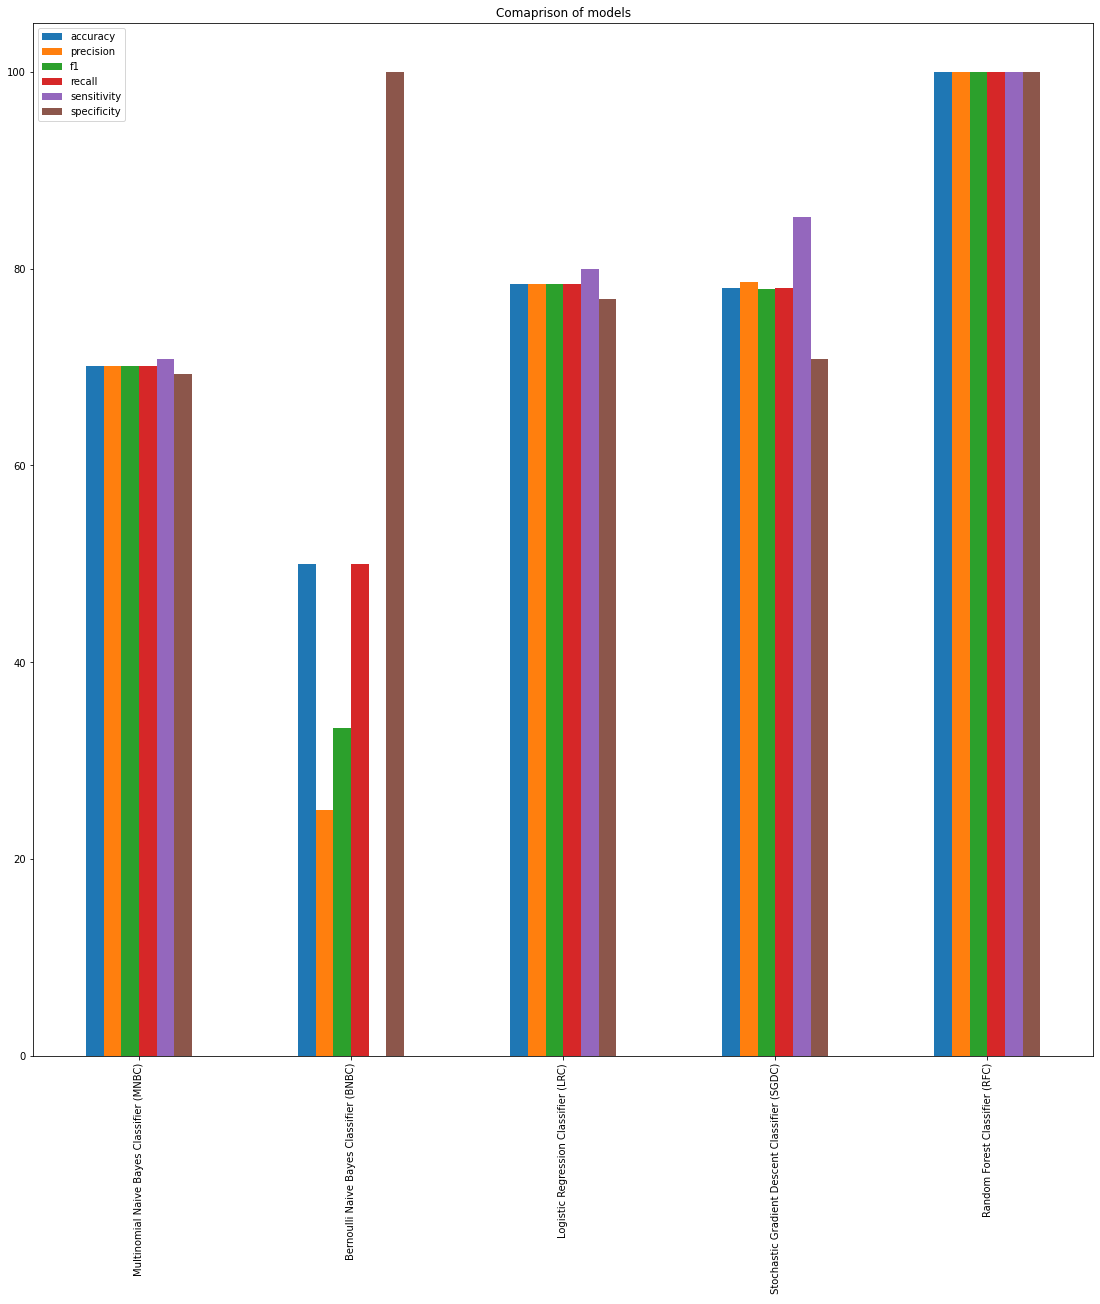

In [35]:
fig =results.plot(kind='bar',title='Comaprison of models',figsize =(19,19)).get_figure()
fig.savefig('Final Result.png')

array([<AxesSubplot:title={'center':'accuracy'}>,
       <AxesSubplot:title={'center':'precision'}>,
       <AxesSubplot:title={'center':'f1'}>,
       <AxesSubplot:title={'center':'recall'}>,
       <AxesSubplot:title={'center':'sensitivity'}>,
       <AxesSubplot:title={'center':'specificity'}>], dtype=object)

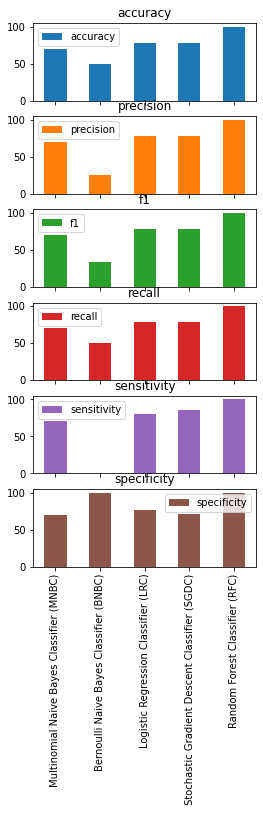

In [36]:
results.plot(subplots=True,kind ='bar',figsize=(4,10))

# Saving the model

In [37]:
pickle.dump(rfc,open('model.pkl','wb'))